In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import requests

In [3]:
key = "API KEY HERE"

In [5]:
instruments = 'https://apiservice.borsdata.se/v1/instruments?authKey=API KEY HERE'
content = requests.get(instruments, headers={'content-type': 'application/json'})
data = content.json()['instruments']

df_instruments = pd.DataFrame(data)

df_instruments

,insId,name,urlName,instrument,isin,ticker,yahoo,sectorId,marketId,branchId,countryId,listingDate,stockPriceCurrency,reportCurrency
0,2,AAK,aarhuskarlshamn,0,SE0011337708,AAK,AAK.ST,2.0,1,63.0,1,2005-09-29T00:00:00,SEK,SEK
1,3,ABB,abb,0,CH0012221716,ABB,ABB.ST,5.0,1,23.0,1,1999-06-22T00:00:00,SEK,USD
2,6,Active Biotech,active-biotech,0,SE0001137985,ACTI,ACTI.ST,4.0,3,78.0,1,1997-11-25T00:00:00,SEK,SEK
3,7,Addnode,addnode,0,SE0017885767,ANOD B,ANOD-B.ST,6.0,1,89.0,1,1999-06-10T00:00:00,SEK,SEK
4,8,Addtech,addtech,0,SE0014781795,ADDT B,ADDT-B.ST,5.0,1,24.0,1,2001-09-03T00:00:00,SEK,SEK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1850,2521,Gosol Energy,gosol-energy,0,SE0020845071,GOSOL,GOSOL.ST,10.0,5,13.0,1,2023-11-28T00:00:00,SEK,SEK
1851,2522,Cyclezyme,cyclezyme,0,SE0020975852,CYCLE,CYCLE.ST,4.0,5,78.0,1,2023-12-22T00:00:00,SEK,SEK
1852,2523,Pohjanmaan Arvo,pohjanmaan-arvo,0,FI4000532320,ARVOSK,ARVOSK.HE,1.0,30,73.0,3,2023-06-20T00:00:00,EUR,EUR
1853,2524,Webrock Ventures,webrock-ventures,0,SE0016278139,WRV,WRV.ST,1.0,4,73.0,1,2024-02-05T00:00:00,SEK,SEK


In [7]:
company = "Surgical Science"

compid = int(df_instruments.loc[df_instruments["name"] == company]["insId"].values)

report_url = f"https://apiservice.borsdata.se/v1/instruments/{compid}/stockprices?authKey={key}&maxCount=20"

content = requests.get(report_url)

data = content.json()

pricelist = pd.DataFrame(data['stockPricesList'])

pricelist["d"] = pd.to_datetime(pricelist["d"])

pricelist.set_index('d', inplace=True, drop=True)

pricelist

,h,l,c,o,v
d,,,,,
2017-06-19,11.85,8.86,11.50,9.00,2446940
2017-06-20,12.90,10.40,11.20,11.95,837655
2017-06-21,11.40,10.00,11.00,11.40,278035
2017-06-22,11.75,10.80,11.75,11.20,111590
2017-06-26,16.60,12.00,16.60,12.00,649950
...,...,...,...,...,...
2024-05-20,143.00,136.90,141.70,139.00,103943
2024-05-21,146.00,139.60,146.00,139.60,104079
2024-05-22,145.80,140.10,144.30,140.10,137097


In [51]:
mask = pricelist.index >= "2024-01-01"

temp = pricelist[mask]

In [53]:
temp

,h,l,c,o,v
d,,,,,
2024-01-02,183.3,177.5,180.6,182.0,47070
2024-01-03,183.4,171.3,171.4,182.0,60524
2024-01-04,173.8,169.3,172.2,171.4,55561
2024-01-05,172.5,168.4,169.4,172.2,33146
2024-01-08,173.8,168.1,172.8,169.6,43925
...,...,...,...,...,...
2024-05-20,143.0,136.9,141.7,139.0,103943
2024-05-21,146.0,139.6,146.0,139.6,104079
2024-05-22,145.8,140.1,144.3,140.1,137097


TypeError: 'str' object is not callable

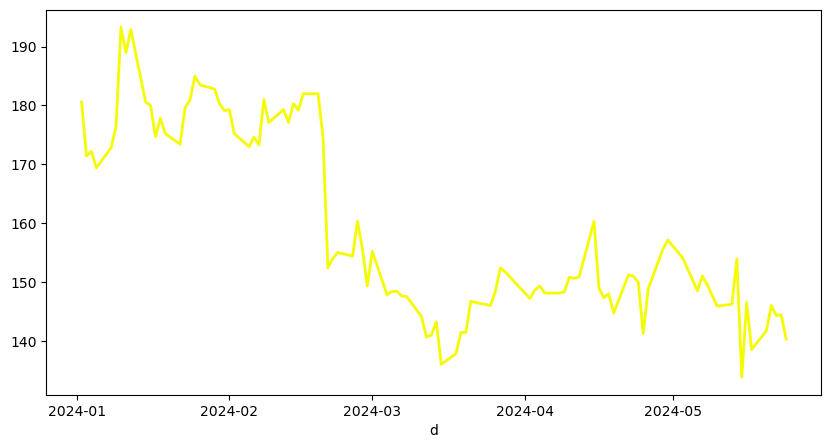

In [56]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.lineplot(temp, y="c", x="d", color="#f4fb04", linewidth = 2, markersize=10)
plt.ylabel("")
plt.xlabel("")

sns.despine(right=True, top=True)

plt.show

In [37]:
plt.xlabel("")

TypeError: 'str' object is not callable